# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "C:\\Users\\bouch\\OneDrive\\module_5_challenge\\data\\Mouse_metadata.csv"
study_results_path = "C:\\Users\\bouch\\OneDrive\\module_5_challenge\\data\\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
mouse_study=pd.merge(study_results,mouse_metadata)

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count=mouse_study["Mouse ID"].nunique()
print(mouse_count)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#mice=mouse_study[mouse_study.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
#print(mice)
#unique_mouse_id=mouse_study['Mouse ID'].unique()
#print(unique_mouse_id)
duplicate_mice_id =mouse_study[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
print(duplicate_mice_id)
                                    

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse=mouse_study[mouse_study['Mouse ID'] == 'g989']
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_study=mouse_study.drop_duplicates(subset=['Mouse ID'])
cleaned_mouse_study.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count=cleaned_mouse_study["Mouse ID"].count()
print(clean_mouse_count)

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped_data=mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)']

# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean=grouped_data.mean()
median=grouped_data.median()
variance=grouped_data.var()
standard_deveiation=grouped_data.std()
sem=grouped_data.sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df=pd.DataFrame({'Mean Tumor Volume': mean, 'Median Tumor Volume': median, 'Tumor Volume Variance': variance, 'Tumor Volume Std. Dev.': standard_deveiation, 'Tumor Volume Std. Err.': sem})
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.columns = ['Mean', 'Median', 'Variance', 'std', 'sem']

# Display the summary DataFrame
summary_stats

,Mean,Median,Variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

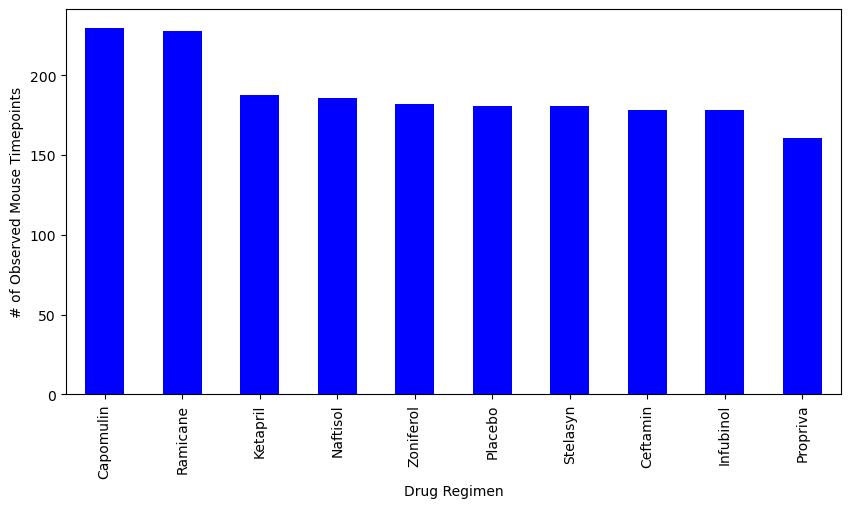

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_rows_panda=mouse_study.groupby('Drug Regimen').size()
regimen_rows_panda_ordered=regimen_rows_panda.sort_values(ascending=False)
regimen_rows_panda_ordered.plot(kind="bar", figsize=(10,5), color="blue")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

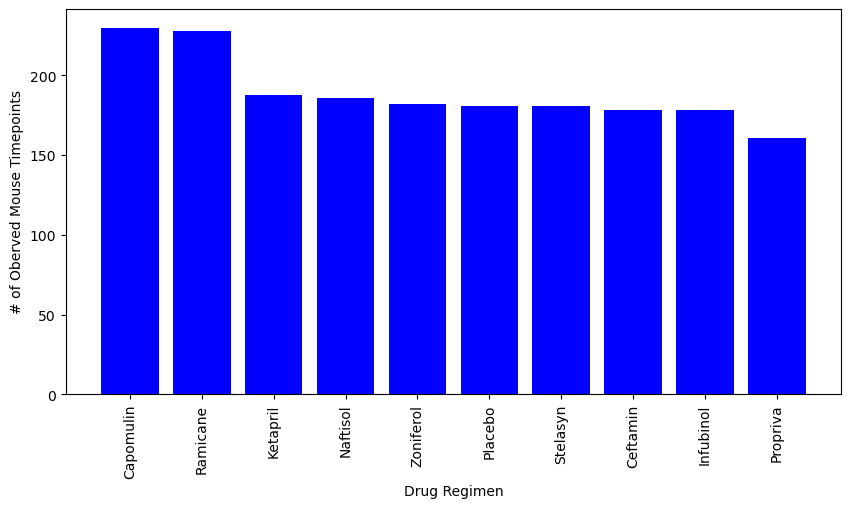

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts_pyplot=mouse_study.groupby('Drug Regimen').size()
regimen_counts_pyplot_ordered=regimen_counts_pyplot.sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.bar(regimen_counts_pyplot_ordered.index,regimen_counts_pyplot_ordered.values, color='blue',)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Oberved Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

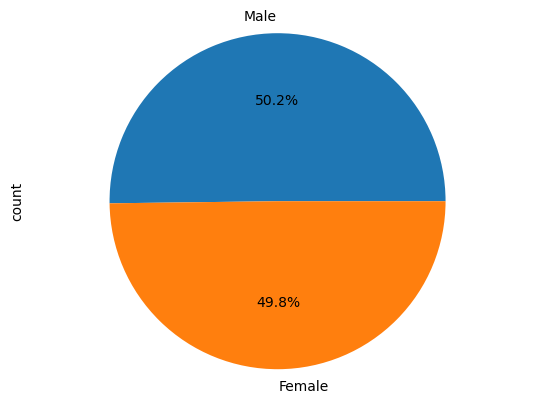

In [32]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_sex=cleaned_mouse_study['Sex'].value_counts()
# Get the unique mice with their gender
unique_sex.plot(kind="pie", autopct='%1.1f%%')
plt.axis('equal')
# Make the pie chart
plt.show()

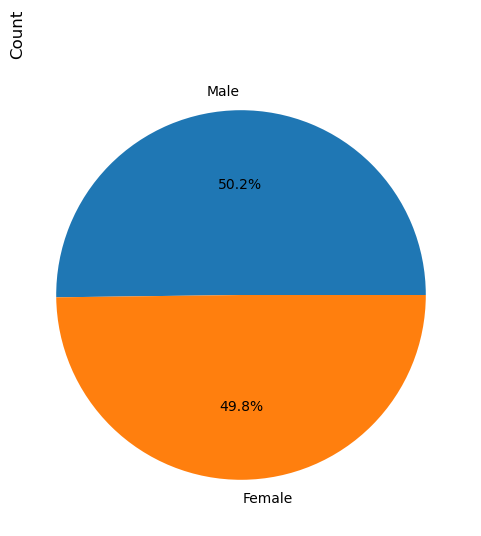

In [49]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
sex_counts=cleaned_mouse_study["Sex"].value_counts()
# Get the unique mice with their gender
plt.figure(figsize=(6,6))
plt.pie(sex_counts,labels=sex_counts.index, autopct='%1.1f%%')
plt.title("Count",loc='left',rotation=90)
plt.tight_layout
# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [92]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=cleaned_mouse_study.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume=pd.merge(last_timepoint, cleaned_mouse_study, on=['Mouse ID','Timepoint'])
regimen_type=final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(['Capomulin','Remicane','Infubinol','Ceftamin'])]
regimen_type[['Mouse ID', 'Drug Regimen','Tumor Volume (mm3)']]

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,45.0
1,a251,Infubinol,45.0
3,a275,Ceftamin,45.0
11,a577,Infubinol,45.0
13,a685,Infubinol,45.0
...,...,...,...
234,y163,Infubinol,45.0
239,y769,Ceftamin,45.0
240,y793,Capomulin,45.0
241,y865,Ceftamin,45.0


In [103]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
potential_outliers=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    drug_data=regimen_type.loc[regimen_type['Drug Regimen']==treatment,'Tumor Volume (mm3)']
#drug_data = regimen_type.loc[regimen_type['Drug Regimen'] == "Capomulin", 'Tumor Volume (mm3)']
#drug_data = regimen_type.loc[regimen_type['Drug Regimen'] == "Ramicane", 'Tumor Volume (mm3)']
#drug_data = regimen_type.loc[regimen_type['Drug Regimen'] == "Infubinol", 'Tumor Volume (mm3)']
#drug_data = regimen_type.loc[regimen_type['Drug Regimen'] == "Ceftamin", 'Tumor Volume (mm3)']

#tumor_volume_data.append(drug_data)
    # add subset


    # Determine outliers using upper and lower bounds
quartiles=drug_data.quantile([.25, .5, .75])
lower_q=quartiles[0.25]
upper_q=quartiles[0.75]
iqr=upper_q-lower_q

lower_bound=lower_q-(1.5*iqr)
upper_bound=upper_q+(1.5*iqr)

potnetial_outliers_treatment=drug_data.loc[(drug_data<lower_bound) | (drug_data>upper_bound)]
print(f"{treatments}'s potential outliers:")
print(potnetial_outliers_treatment)
potential_outliers.append(potnetial_outliers_treatment)

for i, treatment in enumerate (treatments):
    print(f"{treatment}'s potential outliers:")
    if i < len(potential_outliers):
        print(potential_outliers[i])
    else:
        print("No potential outliers found for this treatment.")

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']'s potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:
No potential outliers found for this treatment.
Infubinol's potential outliers:
No potential outliers found for this treatment.
Ceftamin's potential outliers:
No potential outliers found for this treatment.


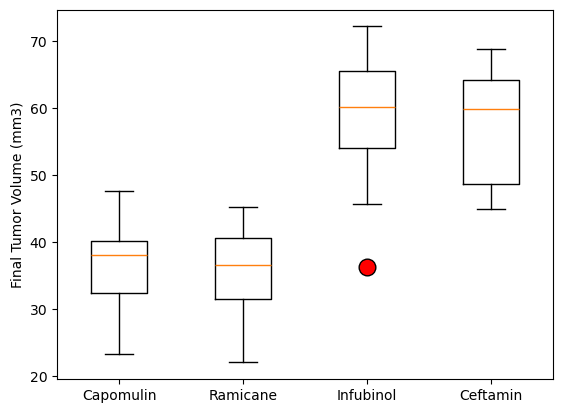

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

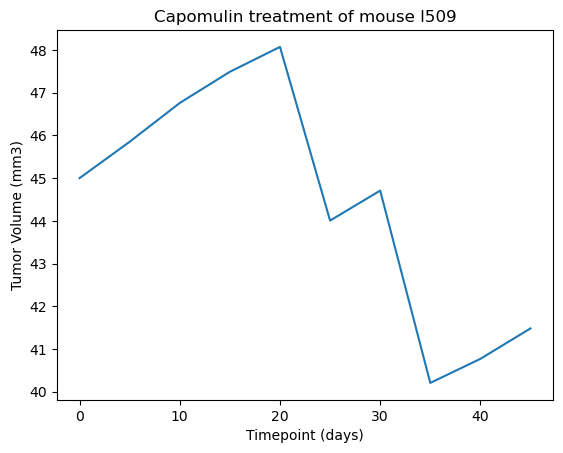

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


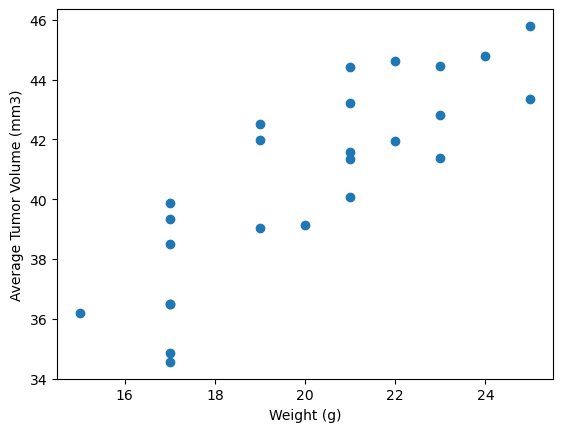

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


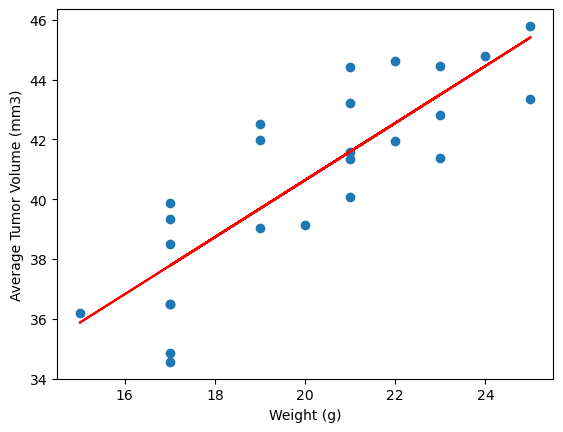

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
